weight = [-14.594  -3.069   0.347  -2.301]
bais = 454.353


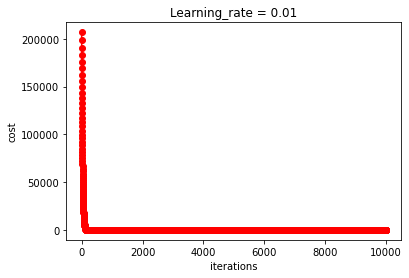

In [9]:
#导入包
from tkinter import W
import pandas
import numpy as np
import matplotlib.pyplot as plt

#设置参数
iterations = 10000
learning_rate = 0.01

#读取数据

ds=pandas.read_csv('Folds5x2_pp.csv')
data = np.array(ds)
m_all = ds.shape[0]
d = ds.shape[1] - 1
m_train = 7176
m_test = m_all - m_train 

#特征缩放（标准化）
mean = np.mean(data[0:m_train,:d],axis=0)

std = np.std(data[0:m_train,:d],axis=0)
data[:,:d] = (data[:,:d] - mean)/std



#划分训练集与测试集
rng = np.random.default_rng(1)
rng.shuffle(data)

train_x = data[0:m_train,0:4].T

train_y = data[0:m_train,4].T

test_x = data[m_train:m_all,:4].T
test_y = data[m_train:m_all,4].T


#初始化w,b,cost[]
w = np.zeros((1,d)).T
b = 0
v = np.ones((1,m_train))
costs_save = []


#迭代
for i in range(iterations):

    y_hat = np.dot(w.T,train_x) + b*v
    e = y_hat - train_y

    w = w - 2*learning_rate*np.dot(train_x,e.T)/m_train
    b = b - 2*learning_rate*np.dot(v,e.T)/m_train

    cost = np.dot(e,e.T) / m_train
    costs_save.append(cost.item(0))

# 输出训练完成的w,b

print(f'weight = {np.around(np.squeeze(w),3)}')
print(f'bais = {np.around(np.squeeze(b),3)}')

#画出代价函数随迭代次数的变化图
plt.figure()
plt.plot(range(1,iterations+1),costs_save,'r-o')
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Learning_rate = " +str(learning_rate))

plt.show()


#计算训练集和测试集的RMSE



#计算指标性能




